In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from math import ceil, floor
from scipy.spatial import distance

In [2]:
def slide_window(A, win_size, stride, padding = None):
    '''Collects windows that slides over a one-dimensional array.

    If padding is None, the last (rightmost) window is dropped if it
    is incomplete, otherwise it is padded with the padding value.
    '''
    if win_size <= 0:
        raise ValueError('Window size must be positive.')
    if not (0 < stride <= win_size):
        raise ValueError(f'Stride must satisfy 0 < stride <= {win_size}.')
    if not A.base is None:
        raise ValueError('Views cannot be slided over!')

    n_elems = len(A)
    if padding is not None:
        n_windows = ceil(n_elems / stride)
        A = np.pad(A, (0, n_windows * win_size - n_elems),
                   constant_values = padding)
    else:
        n_windows = floor(n_elems / stride)
    shape = n_windows, win_size

    elem_size = A.strides[-1]
    return np.lib.stride_tricks.as_strided(
        A, shape = shape,
        strides = (elem_size * stride, elem_size),
        writeable = False)

def window_np_array(X,Y,win_size,win_stride,padding=0):
    X_out = []
    Y_out = []
    for i in range(len(X)):
        out_vec = slide_window(np.array(X[i]),win_size,win_stride)
        for j in range(len(out_vec)):
            X_out.append(out_vec[j])
            Y_out.append(Y[i])
    return np.array(X_out), np.array(Y_out)

In [80]:
df = pd.read_pickle("./gazeldata.pkl")

In [81]:
feat = "Embeddings Hist"
control = "Subject"

In [82]:
df_group = df.groupby([control])["Gaze Target XY",feat]

In [83]:
g_id = list(df_group.groups.keys())

In [84]:
df_group

In [85]:
df[df['Subject'] == 0]["Gaze Target"].tolist()

[2,
 3,
 8,
 6,
 5,
 4,
 7,
 1,
 3,
 6,
 5,
 4,
 2,
 7,
 1,
 8,
 3,
 4,
 7,
 8,
 2,
 1,
 6,
 5,
 5,
 7,
 6,
 1,
 3,
 2,
 8,
 4,
 8,
 4,
 3,
 2,
 1,
 6,
 5,
 7,
 6,
 3,
 7,
 2,
 4,
 5,
 1,
 8,
 6,
 1,
 3,
 4,
 7,
 8,
 2,
 5,
 3,
 1,
 4,
 2,
 6,
 7,
 5,
 8,
 8,
 6,
 5,
 2,
 7,
 3,
 4,
 1,
 4,
 8,
 5,
 2,
 3,
 1,
 6,
 7,
 6,
 5,
 4,
 8,
 3,
 1,
 7,
 2,
 6,
 8,
 1,
 4,
 5,
 3,
 2,
 7,
 7,
 3,
 6,
 8,
 1,
 5,
 2,
 4,
 6,
 8,
 1,
 5,
 3,
 7,
 4,
 2,
 5,
 7,
 6,
 1,
 8,
 4,
 3,
 2,
 3,
 7,
 5,
 4,
 2,
 1,
 8,
 6,
 7,
 5,
 3,
 8,
 4,
 1,
 2,
 6,
 1,
 3,
 2,
 5,
 6,
 4,
 8,
 7,
 6,
 1,
 7,
 4,
 8,
 2,
 3,
 5,
 2,
 6,
 7,
 5,
 8,
 1,
 3,
 4,
 2,
 3,
 5,
 7,
 1,
 6,
 4,
 8,
 2,
 3,
 1,
 8,
 6,
 5,
 7,
 4,
 5,
 4,
 2,
 3,
 8,
 6,
 1,
 7,
 6,
 7,
 3,
 2,
 5,
 8,
 1,
 4,
 6,
 7,
 2,
 1,
 3,
 5,
 4,
 8,
 2,
 4,
 7,
 5,
 6,
 1,
 3,
 8,
 3,
 5,
 2,
 4,
 7,
 1,
 6,
 8,
 4,
 3,
 1,
 5,
 6,
 2,
 5,
 3,
 4,
 6,
 2,
 1,
 2,
 3,
 1,
 5,
 6,
 4,
 4,
 5,
 3,
 2,
 6,
 1,
 5,
 2,
 1,
 4,
 3,
 6,
 5,
 3,
 6,
 2,


In [35]:
gazecoordsAndGrid[0][1]

array([2, 3, 8, 6, 5, 4, 7, 1, 3, 6, 5, 4, 2, 7, 1, 8, 3, 4, 7, 8, 2, 1,
       6, 5, 5, 7, 6, 1, 3, 2, 8, 4, 8, 4, 3, 2, 1, 6, 5, 7, 6, 3, 7, 2,
       4, 5, 1, 8, 6, 1, 3, 4, 7, 8, 2, 5, 3, 1, 4, 2, 6, 7, 5, 8, 8, 6,
       5, 2, 7, 3, 4, 1, 4, 8, 5, 2, 3, 1, 6, 7, 6, 5, 4, 8, 3, 1, 7, 2,
       6, 8, 1, 4, 5, 3, 2, 7, 7, 3, 6, 8, 1, 5, 2, 4, 6, 8, 1, 5, 3, 7,
       4, 2, 5, 7, 6, 1, 8, 4, 3, 2, 3, 7, 5, 4, 2, 1, 8, 6, 7, 5, 3, 8,
       4, 1, 2, 6, 1, 3, 2, 5, 6, 4, 8, 7, 6, 1, 7, 4, 8, 2, 3, 5, 2, 6,
       7, 5, 8, 1, 3, 4, 2, 3, 5, 7, 1, 6, 4, 8, 2, 3, 1, 8, 6, 5, 7, 4,
       5, 4, 2, 3, 8, 6, 1, 7, 6, 7, 3, 2, 5, 8, 1, 4, 6, 7, 2, 1, 3, 5,
       4, 8, 2, 4, 7, 5, 6, 1, 3, 8, 3, 5, 2, 4, 7, 1, 6, 8, 4, 3, 1, 5,
       6, 2, 5, 3, 4, 6, 2, 1, 2, 3, 1, 5, 6, 4, 4, 5, 3, 2, 6, 1, 5, 2,
       1, 4, 3, 6, 5, 3, 6, 2, 1, 4, 2, 3, 6, 5, 4, 1, 6, 4, 5, 3, 1, 2,
       5, 4, 2, 3, 1, 6, 6, 1, 5, 4, 3, 2, 5, 2, 1, 4, 6, 3, 2, 5, 4, 3,
       6, 1, 2, 5, 4, 1, 6, 3, 4, 3, 1, 6, 2, 5, 3,

In [78]:
# df = df[(df['Target Gesture'] != 2) & (df['Target Gesture'] != 4)]

In [90]:
gazecoordsAndGrid = []

# for n_windows in range(1,11):
n_windows = 10

feature_len= 26
window_size = n_windows * feature_len
stride_size = window_size

Y_OUT, Y_GT = None, None

for i in range(len(g_id)):
    print("Starting", i)

    X_train, Y_train, X_test, Y_test = None, None, None, None


    X_test = np.array(df[df['Subject'] == i][feat].tolist())
    Y_test = np.array(df[df['Subject'] == i]["Gaze Target XY"].tolist())
    Y2_test = np.array(df[df['Subject'] == i]["Gaze Target"].tolist())


    X_train = np.array(df[df['Subject'] != i][feat].tolist())
    Y_train = np.array(df[df['Subject'] != i]["Gaze Target XY"].tolist())


#         for j in range(len(g_id)):
#             df_extract = df_group.get_group(g_id[j])
#             x = np.array(df_extract[feat].tolist())
#             y = np.array(df_extract["Gaze Target XY"].tolist())
#             y2 = np.array(df_extract["Gaze Target XY"].tolist())

#             if g_id[i] == g_id[j]:
#                 X_test = x
#                 Y_test = y
#                 Y2_test = y2;
#             else:
#                 if X_train is None:
#                     X_train = x
#                     Y_train = y
#                     Y2_train = y2;
#                 else:
#                     X_train = np.vstack((X_train,x))
#                     Y_train = np.vstack((Y_train,y))
#                     Y2_train = np.vstack((Y2_train,y2));

    X_train = np.nan_to_num(X_train)
    X_test = np.nan_to_num(X_test)

    X_train = X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])
    X_test = X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])

#         X_train, Y_train = window_np_array(X_train,Y_train,win_size=window_size,win_stride=stride_size)
#         X_test, Y_test = window_np_array(X_test,Y_test,win_size=window_size,win_stride=stride_size)

    min_max_scaler_x = preprocessing.MinMaxScaler()
    X_train = min_max_scaler_x.fit_transform(X_train)
    X_test = min_max_scaler_x.transform(X_test)

#         clf = ExtraTreesRegressor(n_estimators=100)

    clf_x = SVR(kernel='poly')
#     clf_x = ExtraTreesRegressor(n_estimators=100)
    clf_x.fit(X_train,Y_train[:,0])

    clf_y = SVR(kernel='poly')
#     clf_y = ExtraTreesRegressor(n_estimators=100)
    clf_y.fit(X_train,Y_train[:,1])

#         Y_pred = clf.predict(X_test)

    Y_pred_x = clf_x.predict(X_test)
    Y_pred_y = clf_y.predict(X_test)
    Y_pred = np.zeros_like(Y_test)
    Y_pred[:,0] = Y_pred_x
    Y_pred[:,1] = Y_pred_y

    gazecoordsAndGrid.append([Y_pred.copy(), Y2_test.copy()])


    if Y_OUT is None:
        Y_OUT = Y_pred
        Y_GT = Y_test
    else:
        Y_OUT = np.vstack((Y_OUT,Y_pred))
        Y_GT = np.vstack((Y_GT,Y_test))


Y_OUT = Y_OUT * [6.4, 12.8]
Y_GT = Y_GT * [6.4, 12.8]

Y_err = abs(Y_OUT - Y_GT)

print(n_windows)
print("\t X Error",np.mean(Y_err,axis=0)[0],"SD",np.std(Y_err,axis=0)[0])
print("\t Y Error",np.mean(Y_err,axis=0)[1],"SD",np.std(Y_err,axis=0)[1])

total_err = []
for i in range(len(Y_OUT)):
    dist = distance.euclidean(Y_OUT[i],Y_GT[i])
    total_err.append(dist)
print("\t Total Eucilidean Error",np.mean(total_err),"SD",np.std(total_err))

Starting 0
Starting 1
Starting 2
Starting 3
Starting 4
Starting 5
Starting 6
Starting 7
Starting 8
Starting 9
10
	 X Error 0.5097675202323265 SD 0.36271759279546606
	 Y Error 1.7518381179066604 SD 1.3698762425158038
	 Total Eucilidean Error 1.907613148182002 SD 1.3030490262650336


In [102]:
[np.mean(np.array(total_err)[df['Subject'] == x]) for x in range(10)]

[1.370871812888814,
 2.58253714888218,
 1.5971145332407257,
 3.0047480641558058,
 1.502502159463429,
 2.5489652569597863,
 1.8334007373415364,
 1.5595669107647612,
 1.65890750225279,
 1.4576377598075902]

In [33]:
len(gazecoordsAndGrid[0])

2

In [38]:
allypreds = []

for participant in gazecoordsAndGrid:
    ypred, _ = participant
    allypreds.extend(ypred)

In [39]:
allypreds

[array([0.36833333, 0.25791667]),
 array([0.35166667, 0.56916667]),
 array([0.65833333, 0.845     ]),
 array([0.66666667, 0.42625   ]),
 array([0.65666667, 0.23625   ]),
 array([0.38666667, 0.69      ]),
 array([0.63666667, 0.70208333]),
 array([0.355 , 0.1925]),
 array([0.415     , 0.62833333]),
 array([0.66166667, 0.40875   ]),
 array([0.65833333, 0.24708333]),
 array([0.4       , 0.75541667]),
 array([0.35      , 0.38666667]),
 array([0.65166667, 0.62708333]),
 array([0.34666667, 0.24291667]),
 array([0.66      , 0.84291667]),
 array([0.36333333, 0.75083333]),
 array([0.37666667, 0.66875   ]),
 array([0.65833333, 0.75291667]),
 array([0.65666667, 0.77083333]),
 array([0.37      , 0.48083333]),
 array([0.365     , 0.26333333]),
 array([0.65833333, 0.42958333]),
 array([0.66166667, 0.25875   ]),
 array([0.65666667, 0.295     ]),
 array([0.66166667, 0.76375   ]),
 array([0.65833333, 0.46      ]),
 array([0.34333333, 0.25166667]),
 array([0.35833333, 0.74041667]),
 array([0.355     , 0.

In [146]:
df

,Subject,Set,Gesture Target Name,Gaze Target,Timestamp,Target Gesture,Target Gaze,Detected Gesture,Detected Gaze,Headsize Hist,Embeddings Hist,Gazepreds Hist,Gestpreds Hist,IMU Hist,Face Detection Hist,Grid?,Calib?,Gaze Target XY,Raw Gazepreds Hist
0,0,grid1_results,Left flick,2,1616861680190,3,2,3,2.0,"[0.15474085291843467, 0.15339179082189278, 0.1...","[[-1.0722655057907104, 0.58056640625, -1.44726...","[[0.4408655819624567, 0.6998267022815959], [0....","[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...","[[[-1.4482886795351362, 0.3025457372458007, -0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",True,False,"[0.3333333333333333, 0.375]","[[0.4929199516773224, 0.75927734375], [0.53222..."
1,0,grid1_results,Left flick,3,1616861688421,3,3,8,3.0,"[0.15691431449493426, 0.15682658274679012, 0.1...","[[-0.39697265625, 0.697265625, -1.326171755790...","[[0.46081477168312146, 0.255917388931368], [0....","[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...","[[[1.4740792603976929, 2.564706791592404, 3.40...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",True,False,"[0.3333333333333333, 0.625]","[[0.4870605170726776, 0.58837890625], [0.35034..."
2,0,grid1_results,Left flick,8,1616861696207,3,8,8,8.0,"[0.15572123907585184, 0.15590843944757327, 0.1...","[[-0.2340088039636612, 0.390380859375, -0.9882...","[[0.6430930385547162, 0.23461348346047345], [0...","[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...","[[[-0.7633721438833612, -0.3915406208514074, 0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",True,False,"[0.6666666666666666, 0.875]","[[0.61474609375, 0.5478515625], [0.56103515625..."
3,0,grid1_results,Left flick,6,1616861702620,3,6,3,6.0,"[0.15649527662761092, 0.15630403107833635, 0.1...","[[-0.2170410454273224, 0.86328125, -1.38867175...","[[0.3356502771019181, 0.18717963203196353], [0...","[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...","[[[1.156149215737526, 1.021446039195533, 1.432...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",True,False,"[0.6666666666666666, 0.375]","[[0.4465332329273224, 0.50341796875], [0.55908..."
4,0,grid1_results,Left flick,5,1616861708054,3,5,8,5.0,"[0.15681730829338922, 0.1567678157949997, 0.15...","[[-0.5068359971046448, 0.8930664658546448, -1....","[[0.3037755333955007, 0.3673229709353406], [0....","[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...","[[[0.8394411346085568, 0.8610143938237479, 1.5...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",True,False,"[0.6666666666666666, 0.125]","[[0.432861328125, 0.6455078721046448], [0.4162..."
5,0,grid1_results,Left flick,4,1616861713979,3,4,8,4.0,"[0.15683194002032294, 0.15739750893226956, 0.1...","[[-0.7070311903953552, 0.60546875, -1.30859363...","[[0.49261997935215845, 0.45672004414251005], [...","[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...","[[[-1.1717048648505244, -0.7750242865248442, -...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",True,False,"[0.3333333333333333, 0.875]","[[0.5102539658546448, 0.7382813096046448], [0...."
6,0,grid1_results,Left flick,7,1616861720415,3,7,3,8.0,"[0.15679371817075435, 0.15674527243999392, 0.1...","[[-0.8242188096046448, 0.791015625, -1.3261717...","[[0.38453372016137155, 0.6072503645783636], [0...","[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...","[[[0.023514030120413074, 0.18751153116188723, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",True,False,"[0.6666666666666666, 0.625]","[[0.453857421875, 0.75634765625], [0.7734375, ..."
7,0,grid1_results,Left flick,1,1616861730176,3,1,8,1.0,"[0.15779309213154807, 0.15782172202412895, 0.1...","[[-0.27197265625, 0.525390625, -1.181640505790...","[[0.5464330200780081, 0.230955765204733], [0.2...","[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0,...","[[[0.7486443350421097, 0.12430590773772805, 0....","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",True,False,"[0.3333333333333333, 0.125]","[[0.5400390625, 0.56982421875], [0.37890625, 0..."
8,0,grid1_results,Push away,3,1616861738486,6,3,6,4.0,"[0.1587893197686826, 0.15909939764786302, 0.15...","[[-0.380615234375, 0.7080078721046448, -1.4599...","[[0.41660506252301893, 0.28522602557355514], [...","[[0, 0, 0, 0

In [124]:
import matplotlib.pyplot as plt
import matplotlib
gazeSegmentto16 = df['Target Gaze'] + df['Grid?']*6
allypreds = np.array(allypreds)

In [125]:
max(gazeSegmentto16)

14

[0.5, 0.25]
[0.5, 0.41666666666666663]
[0.5, 0.5833333333333334]
[0.5, 0.75]
[0.5, 0.9166666666666667]
[0.5, 1.0833333333333333]


(0, 1)

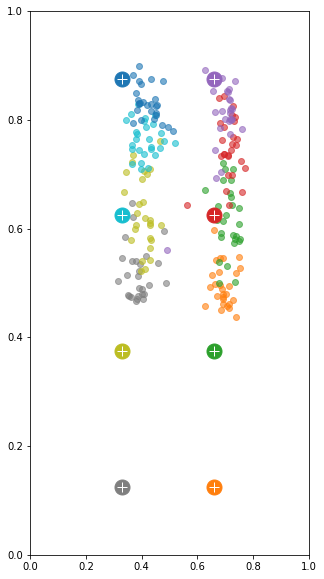

In [156]:
# colors = matplotlib.colors
d = dict()
for i in range(1,7): # List
    print([0.5, 1/12 + i*1/6])
    d[i] = [0.5, 1/12 + i*1/6]
for i in range(7,15):
    d[i] = [.33 + .33*((i+1)%2) ]

d[7] = [.33, .125 ]
d[8] = [.33, .125 + 1* .25]
d[9] = [.33, .125 + 2* .25]
d[10] = [.33, .125 + 3* .25]

d[11] = [.66, .125 ]
d[12] = [.66, .125 + 1* .25]
d[13] = [.66, .125 + 2* .25]
d[14] = [.66, .125 + 3* .25]


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize=(5,10))
# for i in range(1,7):
for i in range(7,15):
#     for subject in range(10):
    subject = 0

#     tmpy = [[] for x in tmpy]
#     print(np.array(tmpy).shape)
#     break
#     finy = np.mean(tmpy, axis=1)
#         print(len(finy))        
#     plt.plot(finy[0], finy[1], 'o', color = colors[i%len(colors)])

    tmpy = df['Raw Gazepreds Hist'][(gazeSegmentto16 == i) & (df['Subject'] == subject)]
    tmpy = np.array([np.mean(x,axis=0) for x in tmpy])
#     tmpy = np.array([np.mean(x) for x in tmpy])
#     tmpy = allypreds[gazeSegmentto16 == i]
#     tmpy = allypreds[(gazeSegmentto16 == i) & (df['Subject'] == subject)]
    plt.plot(tmpy[:,0], tmpy[:,1], 'o', color = colors[i%len(colors)], alpha=0.6)
    
    plt.plot(d[i][0], d[i][1], "o", markersize = 15, color = colors[i%len(colors)])
    plt.plot(d[i][0], d[i][1], "+", markersize = 10, color = "white")
plt.xlim(0,1)
plt.ylim(0,1)


    
#     plt.plot()


In [155]:
tmpy

array([[7.11669916, 7.97167993],
       [6.87207022, 8.77734399],
       [7.04980475, 8.53222662],
       [7.09619141, 8.51660168],
       [7.15209973, 8.12890625],
       [6.9916994 , 8.01953137],
       [6.27978519, 8.92285162],
       [7.18310553, 8.18847698],
       [7.19042975, 7.99975598],
       [7.12500006, 8.56250006],
       [6.67822278, 6.92871091],
       [7.6108399 , 7.82495129],
       [6.56518555, 8.52417004],
       [6.88134772, 8.15820333],
       [6.79467779, 7.85229516],
       [7.17285186, 8.01562518],
       [6.64038104, 8.14062512],
       [7.36279303, 8.71533221],
       [7.18261731, 7.74560565],
       [4.91674814, 5.59936532],
       [7.16723642, 8.35961926],
       [7.23779309, 8.2001954 ],
       [6.61962885, 7.45141608],
       [6.84716794, 7.04418945],
       [7.22314471, 8.01367199],
       [7.13769525, 8.38012701],
       [7.18554711, 8.22094733]])